In [13]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap
from shapely import wkt
import json

In [14]:
nyc_area_features = gpd.read_file('cleaned_data/nyc_high_income_area_with_features.geojson')
with open('data/existing_shops_zip_code.json') as f:
    shops = json.load(f)
trader_joes_locations = shops['Trader Joe\'s']

In [15]:
print(nyc_area_features.columns.tolist())

['modzcta', 'label', 'zcta', 'pop_est', 'ZCTA', 'Median_Household_Income', 'Bachelors_Degree_or_Higher', 'Total_Population', 'Population_25_to_44', 'Percent_25_to_44', 'White_Population', 'Asian_Population', 'Percent_White', 'Percent_Asian', 'Median_Home_Value', 'Median_Gross_Rent', 'area_sqkm', 'subway_count', 'subway_density', 'subway_density_normalized', 'parking_lot_count', 'parking_density', 'parking_density_normalized', 'distance_to_truck_route', 'crime_count', 'crime_density', 'crime_density_inverse', 'crime_normalized', 'distance_to_truck_route_inverse', 'truck_route_normalized', 'rent_inverse', 'home_value_inverse', 'rent_inverse_normalized', 'home_value_inverse_normalized', 'Population_Normalized', 'Young_Adult_Normalized', 'White_Pop_Normalized', 'Asian_Pop_Normalized', 'Bachelor_Degree_Normalized', 'Income_Normalized', 'geometry']


Missing values in features:
 Median_Household_Income             1
Bachelors_Degree_or_Higher          1
Total_Population                    1
Population_25_to_44                 1
Percent_25_to_44                    1
White_Population                    1
Asian_Population                    1
Percent_White                       1
Percent_Asian                       1
Median_Home_Value                   7
Median_Gross_Rent                  11
area_sqkm                           0
subway_density                      0
parking_density                     0
distance_to_truck_route             0
crime_count                         0
crime_density                       0
crime_density_inverse               0
distance_to_truck_route_inverse     0
rent_inverse                       11
home_value_inverse                  7
dtype: int64


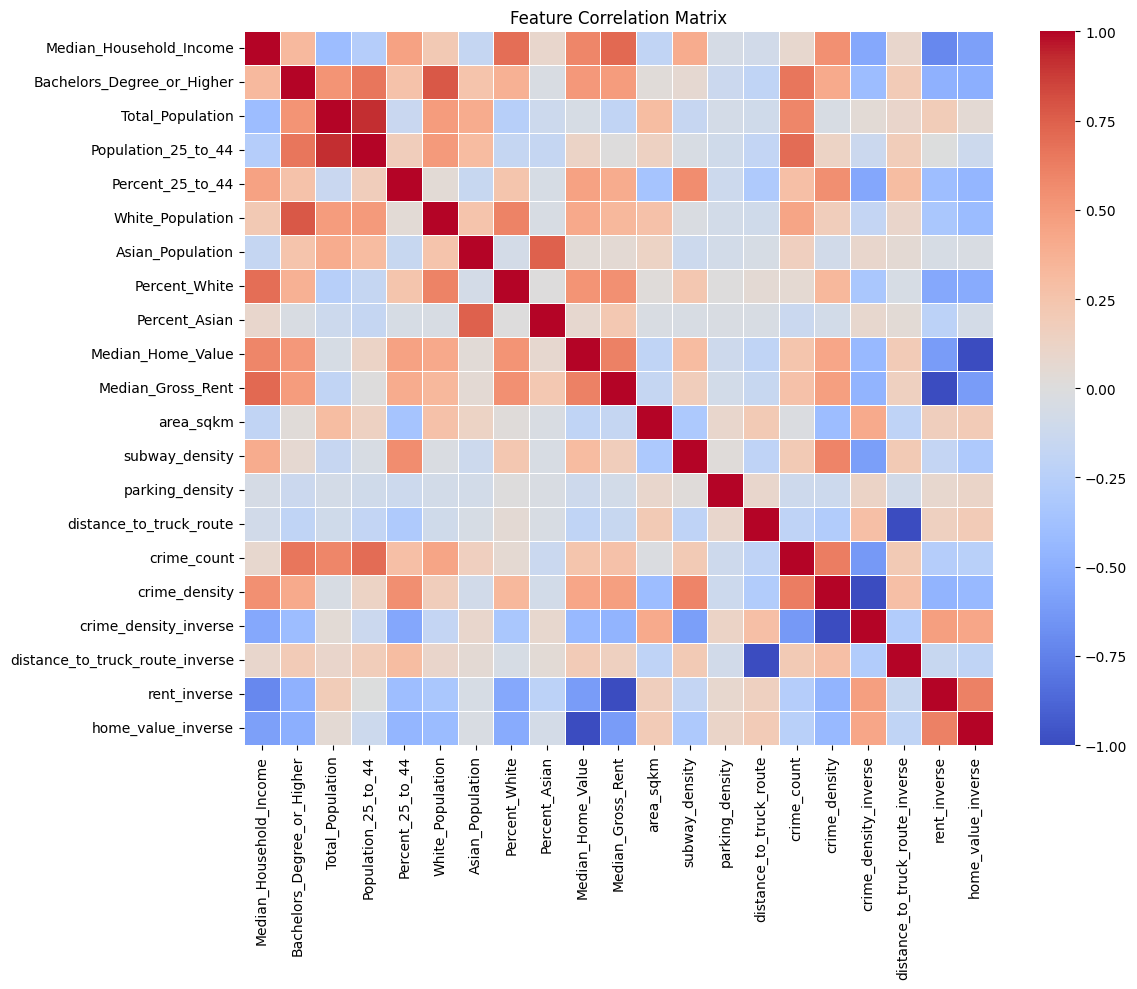

Dropping highly correlated features: ['Population_25_to_44', 'crime_density_inverse', 'distance_to_truck_route_inverse', 'rent_inverse', 'home_value_inverse']

Performing Recursive Feature Elimination with Cross-Validation...
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 16 features.Fitting estimator with 16 features.Fitting estimator with 16 features.Fitting estimator with 16 features.



Fitting estimator with 15 features.
Fitting estimator with 15 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 14 features.
Fitting estimator with 14 features.
Fitting estimator with

/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.

Selected 6 features: ['Bachelors_Degree_or_Higher', 'Percent_White', 'Percent_Asian', 'Median_Home_Value', 'area_sqkm', 'crime_density']

Training final model with selected features...
Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero


Best parameters: {'C': 1, 'l1_ratio': 0.2, 'penalty': 'l2', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.67      0.67      0.67         3

    accuracy                           0.96        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.96      0.96      0.96        45



/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/spacehunter/miniconda/envs/point72/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


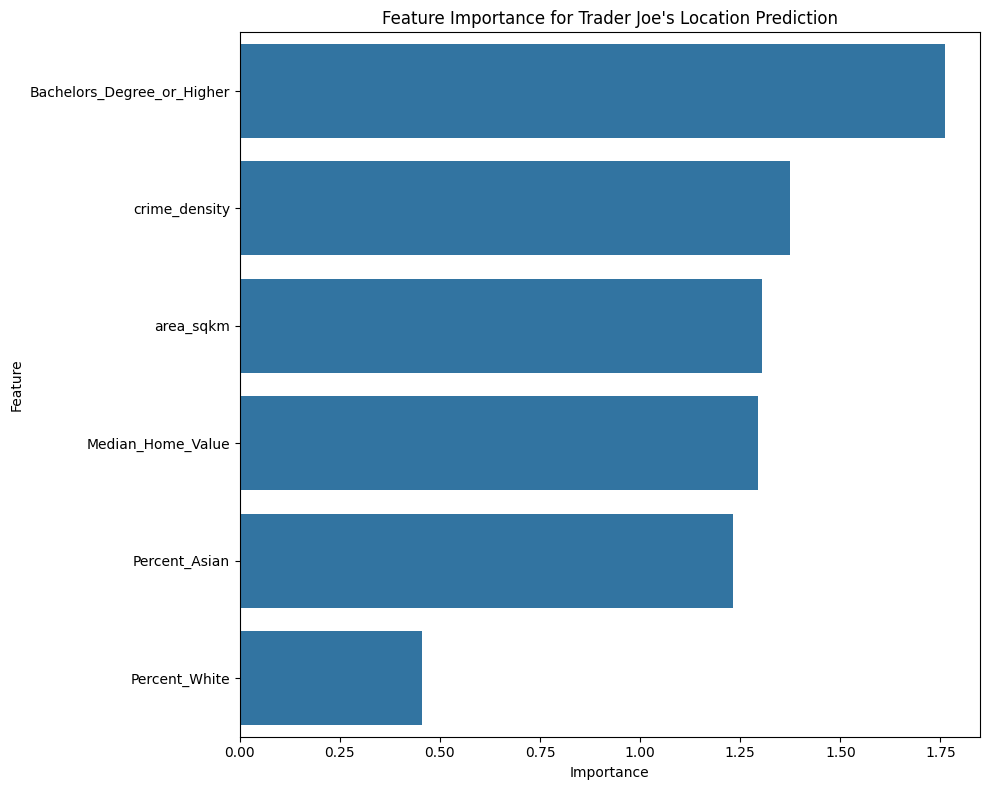


Top 15 predicted locations:
      ZCTA  trader_joes_score  has_trader_joes
14   10016           0.988214                1
2    10003           0.985982                1
23   10025           0.970666                1
21   10023           0.966682                1
18   10019           0.948305                0
33   10036           0.947113                0
10   10011           0.927859                0
8    10009           0.899094                1
20   10022           0.875929                1
148  11375           0.850758                0
0    10001           0.819217                0
89   11201           0.784761                0
1    10002           0.782370                1
12   10013           0.742123                1
39   10128           0.720216                0

Recall at k=15: 0.80


/var/folders/92/b4ww7hzd5bd380sl60bc24m80000gn/T/ipykernel_56073/2056039725.py:159: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/92/b4ww7hzd5bd380sl60bc24m80000gn/T/ipykernel_56073/2056039725.py:159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1200x1000 with 0 Axes>

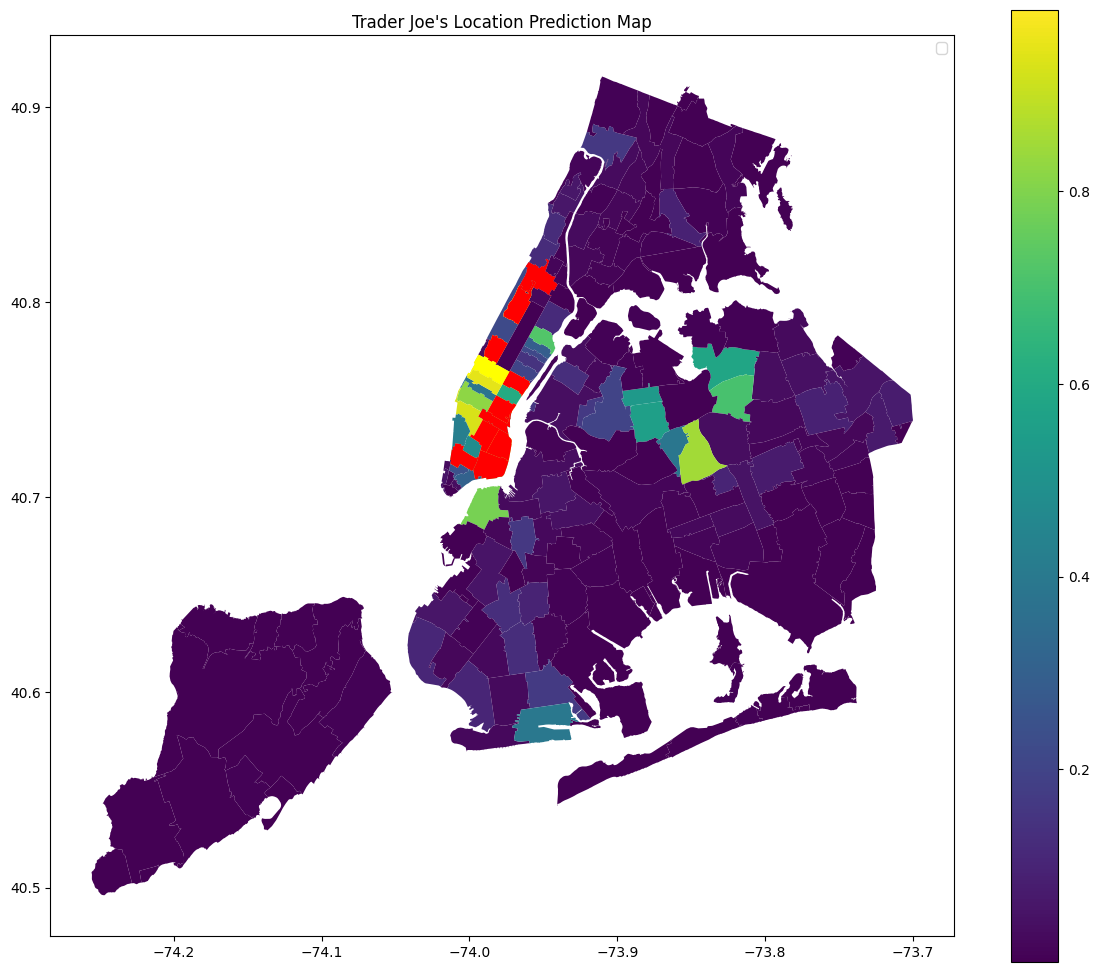


Feature comparison between top 15 predicted locations and existing locations:
Bachelors_Degree_or_Higher: Top 15 mean = 30882.80, Existing mean = 29354.40
Percent_White: Top 15 mean = 59.91, Existing mean = 57.00
Percent_Asian: Top 15 mean = 18.07, Existing mean = 18.04
Median_Home_Value: Top 15 mean = 1015800.00, Existing mean = 1017900.00
area_sqkm: Top 15 mean = 1.92, Existing mean = 1.57
crime_density: Top 15 mean = 188.08, Existing mean = 181.93


In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Read data
nyc_area_features = gpd.read_file('cleaned_data/nyc_ZCTA_raw_features.geojson')
with open('data/existing_shops_zip_code.json') as f:
    shops = json.load(f)
trader_joes_locations = shops['Trader Joe\'s']

# Create target variable: 1 if ZIP code has Trader Joe's, 0 otherwise
nyc_area_features['has_trader_joes'] = nyc_area_features['ZCTA'].isin(trader_joes_locations).astype(int)

# Select relevant features (exclude geometries and redundant IDs)
exclude_cols = ['geometry', 'modzcta', 'label', 'zcta', 'pop_est', 'has_trader_joes', 'ZCTA', 'subway_count', 'parking_lot_count']
features = [col for col in nyc_area_features.columns if col not in exclude_cols]

# Split data into features (X) and target (y)
X = nyc_area_features[features]
y = nyc_area_features['has_trader_joes']

# Check for missing values and handle them
print("Missing values in features:\n", X.isna().sum())
X = X.fillna(X.median())  # Fill missing values with median

# Handle multicollinearity - check correlation
plt.figure(figsize=(12, 10))
correlation = X.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Remove highly correlated features (correlation > 0.8)
def remove_correlated_features(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Dropping highly correlated features: {to_drop}")
    return X.drop(columns=to_drop)

X_filtered = remove_correlated_features(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.25, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply RFECV to select a diverse set of features
print("\nPerforming Recursive Feature Elimination with Cross-Validation...")
rfecv = RFECV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42, solver='saga'),
    step=1,
    cv=StratifiedKFold(5),
    scoring='precision',
    min_features_to_select=5,
    n_jobs=-1,
    verbose=1
)
rfecv.fit(X_train_scaled, y_train)

# Get selected features
selected_features = [X_filtered.columns[i] for i in range(len(X_filtered.columns)) if rfecv.support_[i]]
print(f"\nSelected {len(selected_features)} features: {selected_features}")

# Create training and testing datasets with selected features
X_train_selected = X_train_scaled[:, rfecv.support_]
X_test_selected = X_test_scaled[:, rfecv.support_]

# Train final model with selected features
print("\nTraining final model with selected features...")
logreg = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

# Grid search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.2, 0.5, 0.8]  # only used with elasticnet
}

grid_search = GridSearchCV(
    logreg, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_selected, y_train)

# Best model
print(f"\nBest parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate model
y_pred = best_model.predict(X_test_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance for selected features
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': np.abs(best_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Trader Joe\'s Location Prediction')
plt.tight_layout()
plt.show()

# Create function to score locations using the trained model
def score_locations(X_data, selected_features_indices, model, scaler):
    X_scaled = scaler.transform(X_data)
    X_selected = X_scaled[:, selected_features_indices]
    return model.predict_proba(X_selected)[:, 1]

# Score all neighborhoods and rank them
all_scores = score_locations(X_filtered, rfecv.support_, best_model, scaler)
nyc_area_features['trader_joes_score'] = all_scores

# Check if existing locations are in top rankings
ranked_locations = nyc_area_features[['ZCTA', 'trader_joes_score', 'has_trader_joes']].sort_values(
    'trader_joes_score', ascending=False)
print("\nTop 15 predicted locations:")
print(ranked_locations.head(15))

# Check recall at k=15
top_15_zipcodes = ranked_locations.head(15)['ZCTA'].values
actual_locations = nyc_area_features[nyc_area_features['has_trader_joes'] == 1]['ZCTA'].values
recall_at_15 = len(set(top_15_zipcodes) & set(actual_locations)) / len(actual_locations)
print(f"\nRecall at k=15: {recall_at_15:.2f}")

# Visualize location rankings on a map
plt.figure(figsize=(12, 10))
nyc_area_features.plot(column='trader_joes_score', cmap='viridis', 
                       legend=True, figsize=(12, 10))

# Add markers for existing Trader Joe's locations
existing_stores = nyc_area_features[nyc_area_features['has_trader_joes'] == 1]
existing_stores.plot(ax=plt.gca(), color='red', markersize=50, marker='*', label='Existing Trader Joe\'s')

# Add markers for top recommended new locations that don't have a store yet
recommended_new = nyc_area_features[(nyc_area_features['has_trader_joes'] == 0) & 
                                    (nyc_area_features['ZCTA'].isin(ranked_locations.head(5)['ZCTA']))]
recommended_new.plot(ax=plt.gca(), color='yellow', markersize=50, marker='o', label='Recommended New Locations')

plt.title('Trader Joe\'s Location Prediction Map')
plt.legend()
plt.tight_layout()
plt.show()

# Analyze feature distribution in top ranked vs. existing locations
top_15 = nyc_area_features[nyc_area_features['ZCTA'].isin(ranked_locations.head(15)['ZCTA'])]
existing = nyc_area_features[nyc_area_features['has_trader_joes'] == 1]

print("\nFeature comparison between top 15 predicted locations and existing locations:")
for feature in selected_features:
    top_mean = top_15[feature].mean()
    existing_mean = existing[feature].mean()
    print(f"{feature}: Top 15 mean = {top_mean:.2f}, Existing mean = {existing_mean:.2f}")